# Bibliotecas

In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import *
import numpy as np

# Lendo formatados variados das fontes de dados

## **Como ler fontes de dados diferentes:**
- Uma base CSV ( pd.read_csv(...) )
- Uma base JSON ( pd.read_json(...) )
- Uma base TXT ( pd.read_table(...) )
- Um arquivo EXCEL ( pd.read_excel(...) )
- Uma página HTML ( pd.read_html(...) )

## **Vários métodos e atributos úteis de dataframes, como:**
- info()
- head()
- dtypes
- columns
- shape

In [2]:
dir(dict)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']

In [3]:
help(dict.pop)

Help on method_descriptor:

pop(...)
    D.pop(k[,d]) -> v, remove specified key and return the corresponding value.
    
    If the key is not found, return the default if given; otherwise,
    raise a KeyError.



In [4]:
exempleOne = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Creating a Pandas Series using your data
series = pd.Series(exempleOne)

# Creating a custom index for the Series using list comprehension
index = ['Linha ' + str(i) for i in range(len(series))]

# Assigning the custom index to the Series
series = pd.Series(data=exempleOne, index=index)

print(series)


Linha 0    1
Linha 1    2
Linha 2    3
Linha 3    4
Linha 4    5
Linha 5    6
Linha 6    7
Linha 7    8
Linha 8    9
dtype: int64


In [5]:
# Estrutura de dados DataFrame

exempleTwo = ([1, 2, 3, 4, 5], [6, 7, 8, 9, 10], [11, 12, 13, 14, 15])

df1 = pd.DataFrame(data = exempleTwo)

index = ['Linha ' + str(i) for i in range(len(df1))]
columns = ['Coluna ' + str(i) for i in range(len(df1.columns))]

df1 = pd.DataFrame(data = exempleTwo, index=index, columns=columns)

df1


,Coluna 0,Coluna 1,Coluna 2,Coluna 3,Coluna 4
Linha 0,1,2,3,4,5
Linha 1,6,7,8,9,10
Linha 2,11,12,13,14,15


In [6]:
# df1.index = range(df1.shape[0])
# df1.index

df1.columns.name ='Id' # alterando o nome da coluna do index
df1

Id,Coluna 0,Coluna 1,Coluna 2,Coluna 3,Coluna 4
Linha 0,1,2,3,4,5
Linha 1,6,7,8,9,10
Linha 2,11,12,13,14,15


# Importando um dataframe do Kaggle


In [7]:
# Importando os dados do Kaggle

!kaggle datasets download -d rubenssjr/brasilian-houses-to-rent
!sudo unzip brasilian-houses-to-rent.zip -d ./data/

  0%|                                                | 0.00/282k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 282k/282k [00:00<00:00, 10.3MB/s]
Archive:  brasilian-houses-to-rent.zip
replace ./data/houses_to_rent.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [4]:
# Importando os dados do Kaggle
data = pd.read_csv('/workspaces/datascience-repo/Notebooks/data/houses_to_rent.csv')

In [5]:
def show_the_data(data):
    data.info()
    print("\n\nThe columns are {}".format(data.columns))
    print("\n\nActual Data\n",data.head(2))

show_the_data(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   city                 10692 non-null  object
 1   area                 10692 non-null  int64 
 2   rooms                10692 non-null  int64 
 3   bathroom             10692 non-null  int64 
 4   parking spaces       10692 non-null  int64 
 5   floor                10692 non-null  object
 6   animal               10692 non-null  object
 7   furniture            10692 non-null  object
 8   hoa (R$)             10692 non-null  int64 
 9   rent amount (R$)     10692 non-null  int64 
 10  property tax (R$)    10692 non-null  int64 
 11  fire insurance (R$)  10692 non-null  int64 
 12  total (R$)           10692 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 1.1+ MB


The columns are Index(['city', 'area', 'rooms', 'bathroom', 'parking spaces', 'floor',
       'animal', 

In [6]:
# Selecionando os campos do meu dataframe - Numerical

data[['hoa (R$)', 'area', 'total (R$)']].describe().round().T

,count,mean,std,min,25%,50%,75%,max
hoa (R$),10692.0,1174.0,15592.0,0.0,170.0,560.0,1238.0,1117000.0
area,10692.0,149.0,537.0,11.0,56.0,90.0,182.0,46335.0
total (R$),10692.0,5490.0,16485.0,499.0,2062.0,3582.0,6768.0,1120000.0


In [7]:
# Maneiras de se obter informações sobre o dataset
print(f'A base de dados apresenta {data.shape[0]} registros e {data.shape[1]} campos')

# 2 maneira
print('A base de dados apresenta {} registros e {} campos'.format(data.shape[0], data.shape[1]))


A base de dados apresenta 10692 registros e 13 campos
A base de dados apresenta 10692 registros e 13 campos


In [8]:
# Tipos de dados do meu dataset

data_type = pd.DataFrame(data.dtypes, columns=['Tipos de dados'])
data_type.columns.name = 'Variáveis'
data_type


Variáveis,Tipos de dados
city,object
area,int64
rooms,int64
bathroom,int64
parking spaces,int64
floor,object
animal,object
furniture,object
hoa (R$),int64
rent amount (R$),int64


In [9]:
def categorize(col):
    numerical, category=[], []
    for i in col:
        if data[i].dtype ==object:
            category.append(i)
        else:
            numerical.append(i)
    print("The numerical features {}:".format(numerical))
    print("The categorical features {}:".format(category))
    return category,numerical


In [10]:
# def get_correlated(cor):
#     correlated =set()
#     for i in cor.columns:
#         for j in cor.columns:
#             if cor[i][j]>0.7 or cor[i][j]>-0.7 and i!=j:
#                 correlated.add(i)
#                 correlated.add(j)
#     print("The Correlated columns: {}".format(list(correlated)))
#     return correlated

In [11]:
data.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [12]:
data.isnull().sum()

city                   0
area                   0
rooms                  0
bathroom               0
parking spaces         0
floor                  0
animal                 0
furniture              0
hoa (R$)               0
rent amount (R$)       0
property tax (R$)      0
fire insurance (R$)    0
total (R$)             0
dtype: int64

In [13]:
# Convertendo o tipo de dado de uma coluna de Object para Int64
data['floor'] = data['floor'].replace(['-', 'NaN'], '0').astype(int)

print(data['floor'].dtype)

int64


In [14]:
# Dicionário para traduzir os nomes das colunas

dict_eng_port = {
    'city': 'cidade',
    'area': 'area',
    'rooms': 'quartos',
    'bathroom': 'banheiros',
    'parking spaces': 'vagas estacionamento',
    'floor': 'andar',
    'animal': 'animal',
    'furniture': 'mobiliado',
    'hoa (R$)': 'condominio',
    'rent amount (R$)': 'aluguel',
    'property tax (R$)': 'iptu',
    'fire insurance (R$)': 'seguro incendio',
    'total (R$)': 'total'

}

data = data.rename(columns=dict_eng_port)

data.head()

,cidade,area,quartos,banheiros,vagas estacionamento,andar,animal,mobiliado,condominio,aluguel,iptu,seguro incendio,total
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


In [15]:
print(data['mobiliado'].value_counts())
print('----------------->')
print(data['animal'].value_counts())

mobiliado
not furnished    8086
furnished        2606
Name: count, dtype: int64
----------------->
animal
acept        8316
not acept    2376
Name: count, dtype: int64


In [16]:
data['mobiliado'] = data['mobiliado'].replace({'furnished': '1', 'not furnished': '2'}).astype(int)

In [17]:
data['animal'] = data['animal'].replace({'acept': '1', 'not acept': '2'}).astype(int)

In [18]:
for column, dtype in data.dtypes.items():
    print(f'Tipo {dtype}, Coluna {column}')


Tipo object, Coluna cidade
Tipo int64, Coluna area
Tipo int64, Coluna quartos
Tipo int64, Coluna banheiros
Tipo int64, Coluna vagas estacionamento
Tipo int64, Coluna andar
Tipo int64, Coluna animal
Tipo int64, Coluna mobiliado
Tipo int64, Coluna condominio
Tipo int64, Coluna aluguel
Tipo int64, Coluna iptu
Tipo int64, Coluna seguro incendio
Tipo int64, Coluna total


In [19]:
# Separando as colunas em categoricas e numericas

categorical, numerical = categorize(data.columns)

The numerical features ['area', 'quartos', 'banheiros', 'vagas estacionamento', 'andar', 'animal', 'mobiliado', 'condominio', 'aluguel', 'iptu', 'seguro incendio', 'total']:
The categorical features ['cidade']:


In [20]:
data.head()

,cidade,area,quartos,banheiros,vagas estacionamento,andar,animal,mobiliado,condominio,aluguel,iptu,seguro incendio,total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,2,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,2,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,2,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,2,2,0,800,25,11,836


In [21]:
data['vagas estacionamento'].value_counts(ascending=True)

vagas estacionamento
12       1
10       2
7       33
8      123
6      163
5      230
4      789
3      968
2     2070
0     2683
1     3630
Name: count, dtype: int64

In [22]:
# Condições para substituir valores de uma coluna

# Substituindo valores de uma coluna com base em uma valor
# data['condominio'] = data['condominio'].replace(3, 0)

# Substituindo valores de uma coluna com base em uma condição
data.loc[data['condominio'] < 21, 'condominio'] = 0

In [23]:
# verificando se a substituição foi feita corretamente
result = data[data['condominio'] < 21]
print(result.head())


       cidade  area  quartos  banheiros  vagas estacionamento  andar  animal  \
4   São Paulo    25        1          1                     0      1       2   
5   São Paulo   376        3          3                     7      0       1   
19  São Paulo   600        4          5                     6      0       1   
20  São Paulo   100        7          4                     0      0       1   
23  São Paulo    35        1          1                     0      0       1   

    mobiliado  condominio  aluguel  iptu  seguro incendio  total  
4           2           0      800    25               11    836  
5           2           0     8000   834              121   8955  
19          2           0    12000  9500              181  21680  
20          2           0     3800   118               58   3976  
23          2           0     1100     3               14   1117  


In [24]:
data['cidade'].value_counts()

cidade
São Paulo         5887
Rio de Janeiro    1501
Belo Horizonte    1258
Porto Alegre      1193
Campinas           853
Name: count, dtype: int64

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


Text(0.5, 1.0, 'Valores de Aluguel por Cidade')

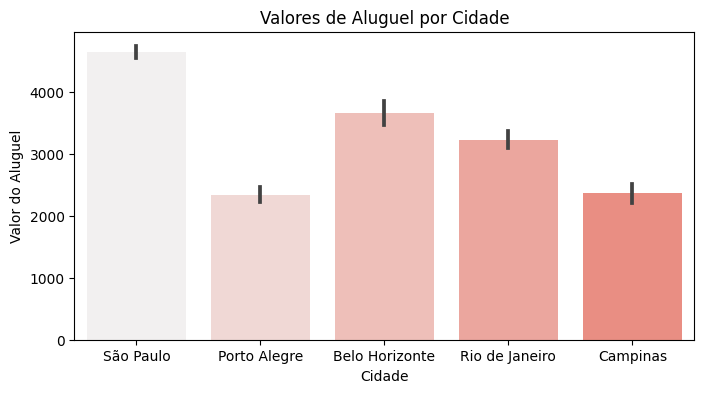

In [25]:
# Gráfico para visualizar a distribuição dos dados de aluguel por cidade

data_sorted = data.sort_values(by='aluguel', ascending=False)

ax = sns.barplot(x='cidade', y='aluguel', data=data_sorted, palette='light:salmon')
ax.figure.set_size_inches(8, 4)

plt.xlabel('Cidade')
plt.ylabel('Valor do Aluguel')
plt.title('Valores de Aluguel por Cidade')

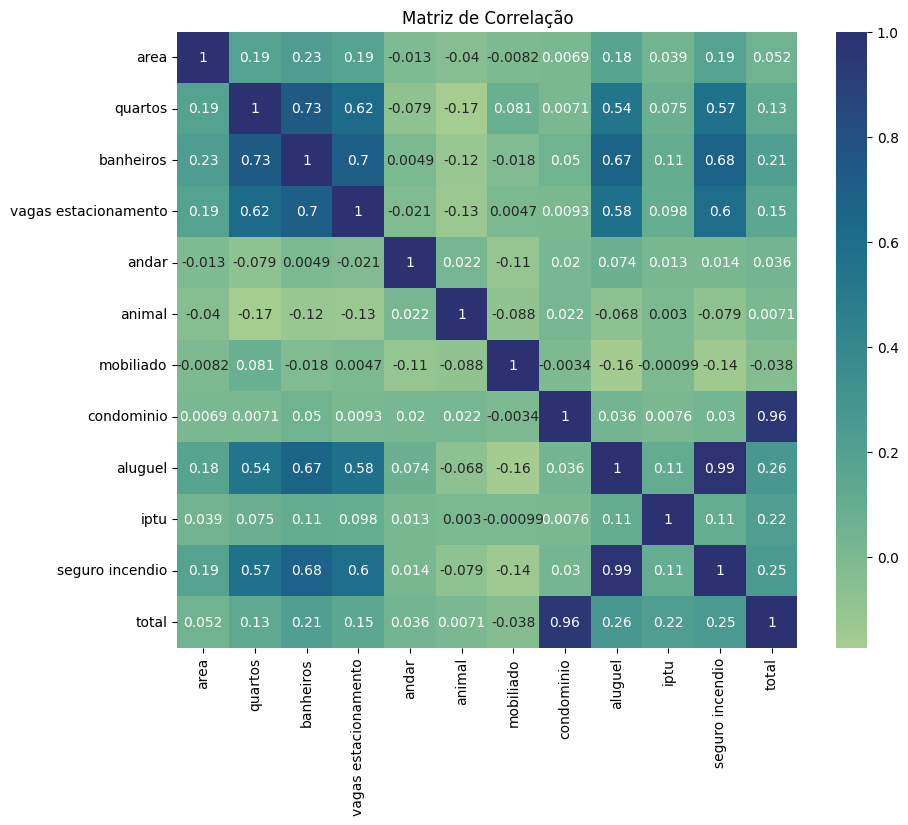

In [26]:
# Matriz de correlação

plt.figure(figsize=[10, 8])
paleta = sns.color_palette('crest', as_cmap=True)
sns.heatmap(data[numerical].corr(), annot=True, cmap=paleta)
plt.title('Matriz de Correlação')
plt.show()

/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/codespace/.local/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDty

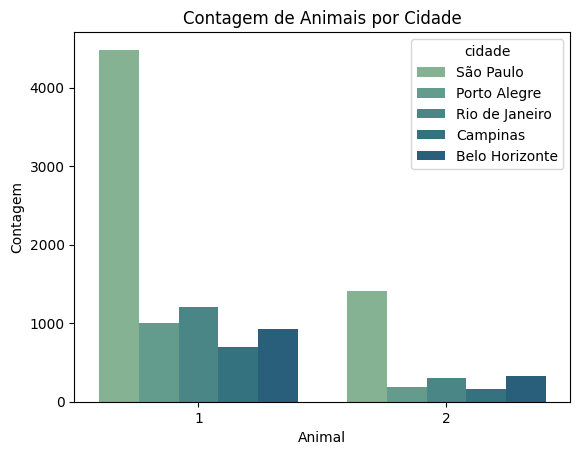

In [27]:
palette = sns.color_palette("crest")

# Crie o gráfico de contagem
sns.countplot(data=data, x='animal', hue='cidade', palette=palette)

# Adicione rótulos aos eixos e um título
plt.xlabel('Animal')
plt.ylabel('Contagem')
plt.title('Contagem de Animais por Cidade')

# Mostre o gráfico
plt.show()

### Quantidade de Residências por Estado que Permitem Animais de Estimação

A análise gráfica revela que o estado de São Paulo lidera em número de residências onde os moradores podem acomodar seus animais de estimação sem preocupações com restrições de permissão.

In [28]:
# reconstruindo o index do dataframe
data.index = range(data.shape[0])

In [29]:
data.head()

,cidade,area,quartos,banheiros,vagas estacionamento,andar,animal,mobiliado,condominio,aluguel,iptu,seguro incendio,total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,2,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,2,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,2,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,2,2,0,800,25,11,836


In [41]:
# Verificando valores nulos individualmente

# data[data['aluguel'].isnull()]

for i in data.columns:
    print(type(i))

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>


In [44]:
# método de interpolação  - preenche os valores nulos com o valor anterior

# data.fillna(method='ffill', inplace=True)

# data.fillna(data.mean(), inplace=True)

In [45]:
data.head()

,cidade,area,quartos,banheiros,vagas estacionamento,andar,animal,mobiliado,condominio,aluguel,iptu,seguro incendio,total
0,São Paulo,70,2,1,1,7,1,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,2,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,2,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,2,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,2,2,0,800,25,11,836


In [50]:
# excluindo colunas do dataframe

# del data['mobiliado']

# data.drop(['mobiliado'], axis=1, inplace=True) # axis = 1 para colunas e axis = 0 para linhas

In [51]:
data.head()


,cidade,area,quartos,banheiros,vagas estacionamento,andar,animal,condominio,aluguel,iptu,seguro incendio,total
0,São Paulo,70,2,1,1,7,1,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,1,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,1,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,1,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,2,0,800,25,11,836


In [53]:
data['total'].aggregate(['min', 'max', 'sum'])

min         499
max     1120000
sum    58704287
Name: total, dtype: int64